<center><u><H1>t-SNE</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load the data

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

In [3]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris = pd.DataFrame(X, columns=features)
df_iris['class'] = y
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Preprocessing the data

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

## Defining models

In [5]:
%%time
tsne = TSNE(n_components=2, perplexity=20.0, n_iter=5000, random_state=2019)
# perplexity [5-50]-valores pequeños para grupos más unidos
X_tsne = tsne.fit_transform(X_std)

Wall time: 1.13 s


## Attributes:

In [6]:
print(tsne.embedding_)

[[-33.925583    16.86837   ]
 [-27.116716    15.981787  ]
 [-28.95447     15.001784  ]
 [-27.903603    14.636097  ]
 [-35.006134    16.549873  ]
 [-37.6699      18.004255  ]
 [-31.01182     14.677138  ]
 [-32.20893     16.455421  ]
 [-26.368925    14.28873   ]
 [-28.097239    16.216034  ]
 [-36.198143    18.26931   ]
 [-31.52169     15.602386  ]
 [-27.212864    15.318382  ]
 [-27.075314    13.609584  ]
 [-38.175056    19.06487   ]
 [-39.237263    18.834003  ]
 [-37.59982     18.260498  ]
 [-33.717316    16.605574  ]
 [-37.138546    18.950071  ]
 [-36.931244    17.189308  ]
 [-33.262787    18.25561   ]
 [-36.2191      16.844501  ]
 [-35.015263    14.883807  ]
 [-32.55124     15.161709  ]
 [-31.511234    15.451353  ]
 [-27.233458    16.465263  ]
 [-32.716232    15.806696  ]
 [-33.95726     17.403603  ]
 [-32.82114     17.31833   ]
 [-28.998995    15.125851  ]
 [-28.022772    15.4481    ]
 [-32.90618     18.215464  ]
 [-38.66456     17.800566  ]
 [-38.847103    18.47705   ]
 [-28.18888   

In [7]:
len(tsne.embedding_)

150

In [8]:
tsne.kl_divergence_

0.2438233196735382

## Training the model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size = 0.30, random_state = 2019)
rf = RandomForestClassifier(n_estimators=1000,criterion='entropy',max_depth=3, random_state=2019)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2019,
                       verbose=0, warm_start=False)

## Metrics:

In [10]:
pred = rf.predict(X_test)

In [11]:
print(f"Accuracy:{accuracy_score(y_test,pred)}")

Accuracy:0.9777777777777777


In [12]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")

Confusion Matrix:
[[19  0  0]
 [ 0  9  1]
 [ 0  0 16]]


In [13]:
print(f"Classification Report:\n{classification_report(y_test,pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.90      0.95        10
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [14]:
scores = cross_val_score(rf, X_tsne, y, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[1.         0.93333333 0.93333333 0.93333333 1.         1.
 0.93333333 0.93333333 1.         1.        ]


In [15]:
print(f"Cross Val Scores Mean:{scores.mean():.4f} / Cross Val Scores Std:{scores.std():.4f}")

Cross Val Scores Mean:0.9667 / Cross Val Scores Std:0.0333


## Plotting Data:

In [16]:
def plot_2d(x, y, title, xlabel="Dimension 1", ylabel="Dimension 2"):
    plt.figure(1, figsize=(10, 8))
    plt.scatter(x, y,
        c=df_iris['class'],
        cmap=plt.cm.cool,        
        s=70)
    
    plt.title(title, fontsize=20, y=1.05)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [17]:
def plot_3d(x, y, z, title):
    fig = plt.figure(1, figsize=(10, 8))
    ax = Axes3D(fig, elev=-90, azim=120)
    
    ax.scatter(x, y, z,
               c=df_iris['class'],
               cmap=plt.cm.cool,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.05)
    
    ax.set_xlabel("Dimension 1", fontsize=16)
    ax.set_ylabel("Dimension 2", fontsize=16)
    ax.set_zlabel("Dimension 3", fontsize=16)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

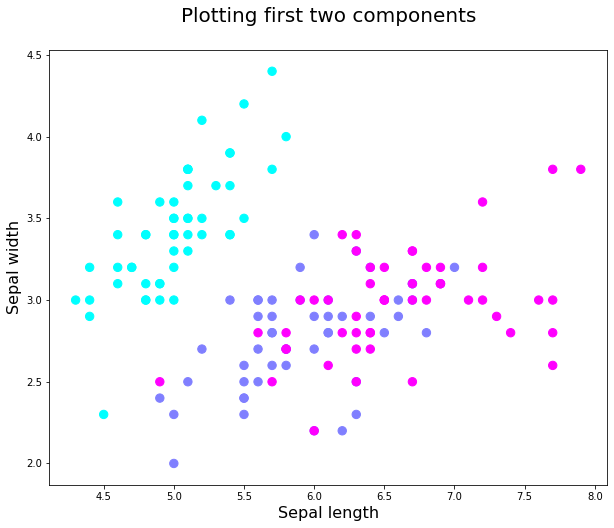

In [18]:
plot_2d(
    x = df_iris['sepal_length'],
    y = df_iris['sepal_width'],
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

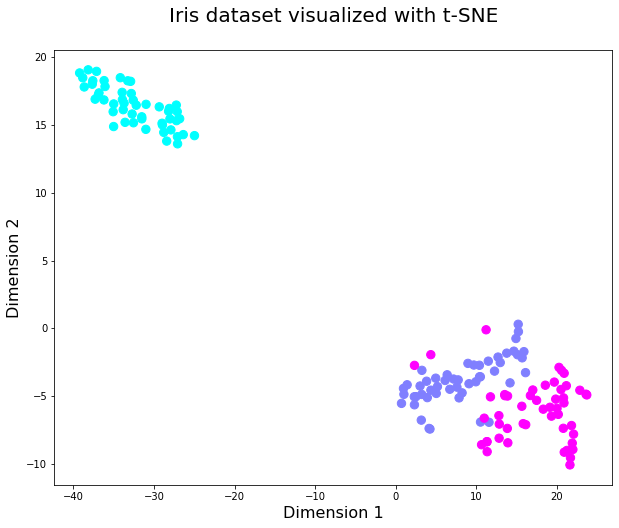

In [19]:
plot_2d(
    x = X_tsne[:, 0],
    y = X_tsne[:, 1],
    title = 'Iris dataset visualized with t-SNE')

## Creating 3d t-SNE

In [20]:
tsne_3 = TSNE(n_components=3, perplexity=8, n_iter=10000, random_state=2019)
X_tsne_3d = tsne_3.fit_transform(X_std)

## Attributes

In [21]:
tsne_3.embedding_.shape

(150, 3)

In [22]:
tsne_3.kl_divergence_

0.20767533779144287

## Plotting in 3D

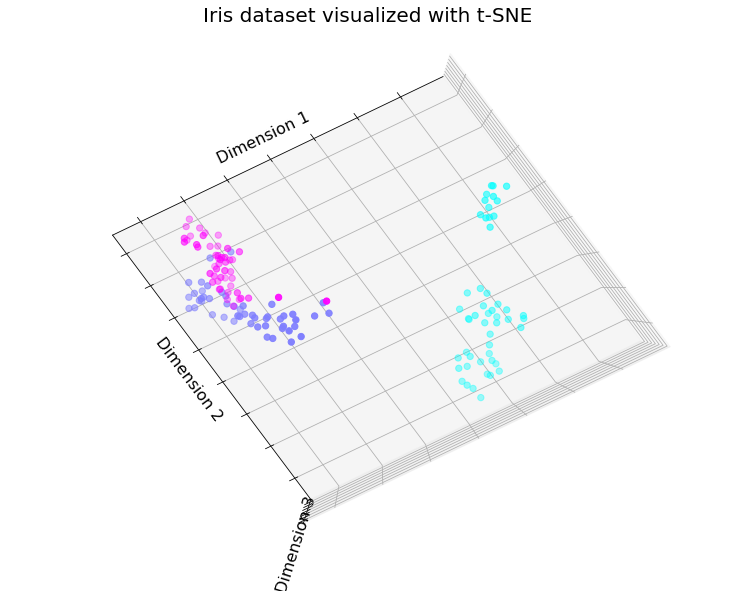

In [23]:
plot_3d(
    x = X_tsne_3d[:,0],
    y = X_tsne_3d[:,1],
    z = X_tsne_3d[:,2],
    title = "Iris dataset visualized with t-SNE")

## Training the model

In [24]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_tsne_3d, y, test_size = 0.30, random_state = 2019)
rf_ = RandomForestClassifier(n_estimators=1000, criterion='entropy',max_depth=3,random_state=2019)
rf_.fit(X_train_,y_train_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2019,
                       verbose=0, warm_start=False)

## Metrics

In [25]:
pred_ = rf_.predict(X_test_)

In [26]:
print(f"Accuracy:{accuracy_score(y_test_,pred_)}")

Accuracy:0.9777777777777777


In [27]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test_,pred_)}")

Confusion Matrix:
[[19  0  0]
 [ 0  9  1]
 [ 0  0 16]]


In [28]:
print(f"Classification Report:\n{classification_report(y_test_,pred_)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.90      0.95        10
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [29]:
scores = cross_val_score(rf_, X_tsne_3d, y, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[1.         0.93333333 1.         0.93333333 0.93333333 1.
 0.93333333 1.         1.         0.93333333]


In [30]:
print(f"Cross Val Scores Mean:{scores.mean():.4f} / Cross Val Scores Std:{scores.std():.4f}")

Cross Val Scores Mean:0.9667 / Cross Val Scores Std:0.0333


## Reference: 
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html